In [1]:
import numpy as np
import tensorflow as tf
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns
from __future__ import division
import pandas as pd

In [2]:
data = pd.read_excel('../data/fire_theft.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


### Assignment 2.1 Polynomial Regression

In [3]:
data['X_2'] = data['X'] **2

X_train = data[['X', 'X_2']]
Y_train = data['Y']

n_instances = X_train.shape[0]
n_features = X_train.shape[1]

In [4]:
X_train.head()

,X,X_2
0,6.2,38.44
1,9.5,90.25
2,10.5,110.25
3,7.7,59.29
4,8.6,73.96


step:0, theta0:0.000, theta1:0.005, theta2:0.135, cost:814.992
step:1000, theta0:0.146, theta1:0.856, theta2:0.039, cost:293.255
step:2000, theta0:0.259, theta1:1.453, theta2:0.019, cost:255.916
step:3000, theta0:0.350, theta1:1.870, theta2:0.005, cost:237.440
step:4000, theta0:0.425, theta1:2.162, theta2:-0.004, cost:228.262
step:5000, theta0:0.488, theta1:2.366, theta2:-0.011, cost:223.665
step:6000, theta0:0.544, theta1:2.507, theta2:-0.016, cost:221.327
step:7000, theta0:0.595, theta1:2.605, theta2:-0.019, cost:220.102
step:8000, theta0:0.642, theta1:2.672, theta2:-0.021, cost:219.425
step:9000, theta0:0.686, theta1:2.718, theta2:-0.023, cost:219.018
step:10000, theta0:0.728, theta1:2.749, theta2:-0.024, cost:218.746
step:11000, theta0:0.768, theta1:2.769, theta2:-0.025, cost:218.539
step:12000, theta0:0.808, theta1:2.782, theta2:-0.025, cost:218.365
step:13000, theta0:0.847, theta1:2.790, theta2:-0.026, cost:218.208
step:14000, theta0:0.885, theta1:2.793, theta2:-0.026, cost:218.0

/Users/80151/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/80151/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


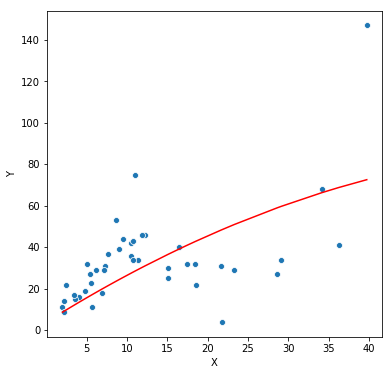

In [5]:
X = tf.placeholder(name='X', dtype=tf.float32, shape=[None, n_features])
Y = tf.placeholder(name='Y', dtype=tf.float32, shape=[None, 1])

thetas = tf.Variable(np.zeros(shape=(n_features, 1)), name='thetas', dtype=tf.float32)
theta0 = tf.Variable(0.0, name='theta0', dtype=tf.float32)

y_pred = tf.matmul(X,thetas) + theta0

cost_function = (1.0/ (2.0 * n_instances)) * tf.reduce_sum(tf.pow((y_pred - Y), 2))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(cost_function)

all_instances_feed_dict = {
    X : data[['X', 'X_2']].values,
    Y : data['Y'].values.reshape(-1, 1)
}

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(100000):
        sess.run(optimizer, all_instances_feed_dict)
        
        if(step % 1000 == 0):
            tts = sess.run(thetas)
            tt0 = sess.run(theta0)
            cost = sess.run(cost_function, all_instances_feed_dict)
            print(f"step:{step}, theta0:{tt0:.3f}, theta1:{tts[0][0]:.3f}, theta2:{tts[1][0]:.3f}, cost:{cost:.3f}")
    
    plt.figure(figsize=(6,6))
    sns.scatterplot(X_train['X'], Y_train)
    sns.lineplot(X_train['X'], sess.run(y_pred, all_instances_feed_dict).flatten(), c='r')
    plt.show()

### Problem 2.2 Feature Scaling

In [9]:
X_train.head()

,X,X_2
0,6.2,38.44
1,9.5,90.25
2,10.5,110.25
3,7.7,59.29
4,8.6,73.96


step:0, theta0=10.100, theta1=3.719, theta2=4.012, cost=465.647
step:1000, theta0=33.667, theta1=-5.848, theta2=19.314, cost=166.208
step:2000, theta0=33.667, theta1=-5.848, theta2=19.314, cost=166.208
step:3000, theta0=33.667, theta1=-5.848, theta2=19.314, cost=166.208
step:4000, theta0=33.667, theta1=-5.848, theta2=19.314, cost=166.208
step:5000, theta0=33.667, theta1=-5.848, theta2=19.314, cost=166.208
step:6000, theta0=33.667, theta1=-5.848, theta2=19.314, cost=166.208
step:7000, theta0=33.667, theta1=-5.848, theta2=19.314, cost=166.208
step:8000, theta0=33.667, theta1=-5.848, theta2=19.314, cost=166.208
step:9000, theta0=33.667, theta1=-5.848, theta2=19.314, cost=166.208
step:10000, theta0=33.667, theta1=-5.848, theta2=19.314, cost=166.208
step:11000, theta0=33.667, theta1=-5.848, theta2=19.314, cost=166.208
step:12000, theta0=33.667, theta1=-5.848, theta2=19.314, cost=166.208
step:13000, theta0=33.667, theta1=-5.848, theta2=19.314, cost=166.208
step:14000, theta0=33.667, theta1=-

/Users/80151/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/80151/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


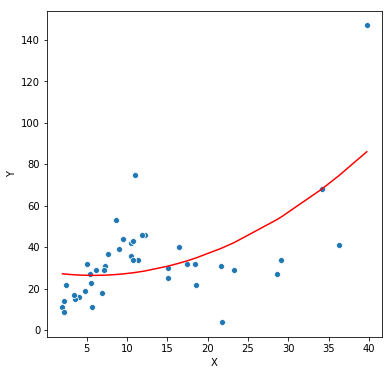

In [29]:
X = tf.placeholder(name='X', dtype=tf.float32, shape=[None, n_features])
Y = tf.placeholder(name='Y', dtype=tf.float32, shape=[None, 1])

thetas = tf.Variable(np.zeros(shape=(n_features, 1)), dtype=tf.float32, name='thetas')
theta0 = tf.Variable(0.0, name='theta0')

y_pred = tf.matmul(X, thetas) + theta0

cost_function = (1.0 / (2.0*n_instances)) * tf.reduce_sum(tf.pow((y_pred - Y), 2))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.3).minimize(cost_function)

X_train_scaled = (X_train - X_train.mean()) / X_train.std()
scaled_X_train_feed_dict = {
    X : X_train_scaled.values,
    Y : Y_train.values.reshape(-1, 1)
}

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(30000):
        sess.run(optimizer, scaled_X_train_feed_dict)
        
        if(step % 1000 == 0):
            tts = sess.run(thetas)
            tt0 = sess.run(theta0)
            cost = sess.run(cost_function, scaled_X_train_feed_dict)
            print(f"step:{step}, theta0={tt0:.3f}, theta1={tts[0][0]:.3f}, theta2={tts[1][0]:.3f}, cost={cost:.3f}")
            
    plt.figure(figsize=(6,6))
    sns.scatterplot(data['X'], data['Y'])
    sns.lineplot(data['X'], sess.run(y_pred, scaled_X_train_feed_dict).flatten(), c='r')
    plt.show()